# Mod 3

In [2]:
!python3 -m pip install numpy pandas matplotlib scipy sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!curl -o supermarket-sales.csv -H "Accept: application/csv" -X GET https://raw.githubusercontent.com/danyentezari/bignumber-material/master/SPML%20Dubai/mod1/supermarket-sales.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128k  100  128k    0     0   134k      0 --:--:-- --:--:-- --:--:--  133k


### 1. Descriptive Statistics

In [4]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read the data into a dataframe
sales_df = pd.read_csv('./supermarket-sales.csv')

In [6]:
# Preview the data with the head method
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Use the columns attribute
sales_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# Example of a categorical, nominal variable
sales_df['Payment'].head()

0        Ewallet
1           Cash
2    Credit card
3        Ewallet
4        Ewallet
Name: Payment, dtype: object

In [10]:
# Descriptive statistics for sales data
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
# sales_df['Unit price'].hist(bins=50)

### 2. Inference 

#### 2.1 Measuring Relationship of Variables

##### Covariance

$\displaystyle\frac{{\sum _{i=0}^n\:\left(x_i-\bar{x}\:\:\right)\left(y_i\:-\bar{y}\right)}}{\:N-1}$

where
- $x_i$ is an element in $X$
- $y_i$ is an element in $Y$
- $\bar{x}$ is mean average of $X$
- $\bar{y}$ is mean average of $Y$

##### Correlation

$r = \displaystyle\frac{{\sum _{i=0}^n\:\left(x_i-\bar{x}\:\:\right)\left(y_i\:-\bar{y}\right)}}{s_{X} s_{Y}}; \quad -1 \leq r \leq 1$

where
- $r$ is Pearson's (sample) correlation coefficient

In [12]:
# Covariane matrix
sales_df.cov()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,701.965331,0.834778,196.668340,4130.035142,3933.366802,0.0,196.668340,-0.399668
Quantity,0.834778,8.546446,24.149570,507.140978,482.991408,0.0,24.149570,-0.079456
Tax 5%,196.668340,24.149570,137.096594,2879.028477,2741.931883,0.0,137.096594,-0.733300
Total,4130.035142,507.140978,2879.028477,60459.598018,57580.569541,0.0,2879.028477,-15.399306
cogs,3933.366802,482.991408,2741.931883,57580.569541,54838.637658,0.0,2741.931883,-14.666006
gross margin percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
gross income,196.668340,24.149570,137.096594,2879.028477,2741.931883,0.0,137.096594,-0.733300
Rating,-0.399668,-0.079456,-0.733300,-15.399306,-14.666006,0.0,-0.733300,2.953518


In [13]:
# Correlation matrix
sales_df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [22]:
# columns_to_extract = ['City', 'Branch']
# sales_df[columns_to_extract]

,City,Branch
0,Yangon,A
1,Naypyitaw,C
2,Yangon,A
3,Yangon,A
4,Yangon,A
...,...,...
995,Naypyitaw,C
996,Mandalay,B
997,Yangon,A
998,Yangon,A


In [24]:
# Create a subset with only two variables: 'Quantity', 'gross income', and 'ratig'
columns_to_extract = ['Quantity', 'gross income', 'Rating']
sales_df_subset = sales_df[columns_to_extract]
sales_df_subset

,Quantity,gross income,Rating
0,7,26.1415,9.1
1,5,3.8200,9.6
2,7,16.2155,7.4
3,8,23.2880,8.4
4,7,30.2085,5.3
...,...,...,...
995,1,2.0175,6.2
996,10,48.6900,4.4
997,1,1.5920,7.7
998,1,3.2910,4.1


In [25]:
# From this DataFrame, choose only 20 rows
sales_df_subset = sales_df_subset[0:20]

# Sort by Quantity
sales_df_subset = sales_df_subset.sort_values(by='Quantity')

# Preview the data
sales_df_subset.head()

,Quantity,gross income,Rating
19,2,4.0300,4.4
8,2,3.6260,7.2
18,3,8.2005,8.6
9,3,8.2260,5.9
10,4,2.8960,4.5


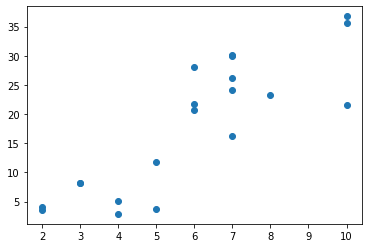

In [29]:
# Scatter plot with r = 0.70

x = sales_df_subset['Quantity'],
y = sales_df_subset['gross income']

plt.scatter(
    x,y
)

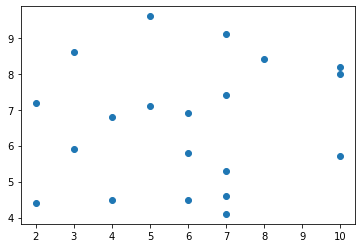

In [17]:
# Scatter plot with r = -0.03
plt.scatter(
    sales_df_subset['Quantity'],
    sales_df_subset['Rating']
)

### 2.2 Modeling the Relationship of Variables

$\hat{Y} = \beta_0 + (\beta_1 \times X) + \epsilon$

$\beta_0$ is the first value on $Y$-axis. It is called Bias Term (or Y-Intercept).<br/>
$\beta_1$ is the weight of the variable, $X$. It is called the Regression Coefficient (or Weight) of $X$.

$\beta_1 = r \times \dfrac{s_{Y}}{s_{X}}$<br/><br/>
$\beta_0 = \bar{Y} - \beta_1 \times \bar{X} $

In [31]:
# Exercise 4


# Given the r, x, and y
# Calculate the regression coefficients, b_0 and b_1 
r = 0.70
x = sales_df_subset['Quantity']
y = sales_df_subset['gross income']


# Hint, use these methods to get standard deviation and mean average
# .std()
# .mean()

# Your solution here...

b_1 = r * ( y.std() / x.std() )
print(b_1)

b_0 = y.mean() - ( b_1 * x.mean()  )
print(b_0)

3.207447469221984
-0.9783374418708028


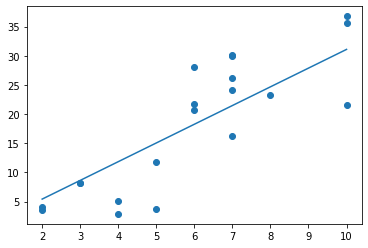

In [33]:
plt.scatter(
    x,
    y
)

y_hat = b_0 + (b_1 * x)

plt.plot(
    x,
    y_hat
)